In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

directory = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/images_original'
categories = []

for subfolder in os.listdir(directory):
    categories.append((subfolder))
        
print(categories) 

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


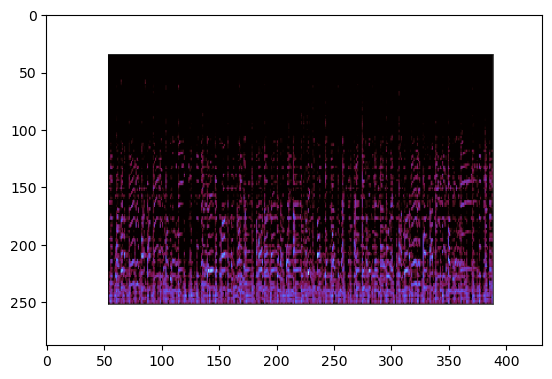

In [2]:
for category in categories:
    path = os.path.join(directory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [3]:
print(img_array.shape)

(288, 432, 3)


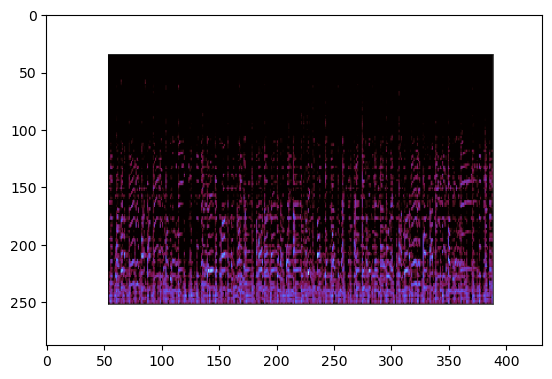

In [16]:
IMG_HEIGHT = 288
IMG_WIDTH = 432
IMG_SIZE = 50

new_array = cv2.resize(img_array,  (IMG_WIDTH, IMG_HEIGHT))
plt.imshow(new_array)
plt.show()

In [17]:
training_data = []

def create_dataset():
    for category in categories:
        path = os.path.join(directory, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array,  (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_dataset()

In [18]:
print(len(training_data))

999


In [19]:
import random

random.shuffle(training_data)

In [20]:
for sample in training_data[:10]:
    print(sample[1])

2
2
6
1
3
0
9
2
4
0


In [21]:
X = []
y = []

In [23]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [24]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

Model 

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# Normalization
X = X/255.0

nb_train_samples = 400
nb_validation_samples = 100
epochs = 10
batch_size = 16

model = Sequential()
model.add(Conv2D(32, (2,2), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=0.2)
##########################


Epoch 1/10
57/57 [==============================] - 3s 27ms/step - loss: -5169.4849 - accuracy: 0.0990 - val_loss: -37564.3633 - val_accuracy: 0.1100
Epoch 2/10
57/57 [==============================] - 1s 25ms/step - loss: -681004.5000 - accuracy: 0.0990 - val_loss: -2489483.2500 - val_accuracy: 0.1100
Epoch 3/10
57/57 [==============================] - 1s 24ms/step - loss: -11695738.0000 - accuracy: 0.0990 - val_loss: -30075832.0000 - val_accuracy: 0.1100
Epoch 4/10
57/57 [==============================] - 2s 30ms/step - loss: -86847152.0000 - accuracy: 0.0990 - val_loss: -173110688.0000 - val_accuracy: 0.1100
Epoch 5/10
57/57 [==============================] - 1s 25ms/step - loss: -374597632.0000 - accuracy: 0.0990 - val_loss: -643746944.0000 - val_accuracy: 0.1100
Epoch 6/10
57/57 [==============================] - 1s 26ms/step - loss: -1193556864.0000 - accuracy: 0.0990 - val_loss: -1832384256.0000 - val_accuracy: 0.1100
Epoch 7/10
57/57 [==============================] - 2s 31ms/s